In [1]:
import pandas as pd
import matplotlib.pyplot as plt

ay = pd.read_csv('hf://datasets/lukebarousse/data_jobs/data_jobs.csv')

ay['job_posted_date'] = pd.to_datetime (ay['job_posted_date'])

c:\Users\EMMANUEL\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import ast

def clean_list(skill_list):
    if pd.notna(skill_list):
        return ast.literal_eval(skill_list)

ay['job_skills']= ay['job_skills'].apply(clean_list)

In [10]:
ay[['job_title_short','job_skills']].head()

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [13]:
type(ay['job_skills'][6])

list

In [19]:
bbj = ay.explode('job_skills') 

In [98]:
bbj['job_skills'].value_counts()

job_skills
sql             384849
python          380909
aws             145381
azure           132527
r               130892
                 ...  
rubyon rails         1
visualbasic          1
msaccess             1
dingtalk             1
rocketchat           1
Name: count, Length: 252, dtype: int64

<Axes: xlabel='job_skills'>

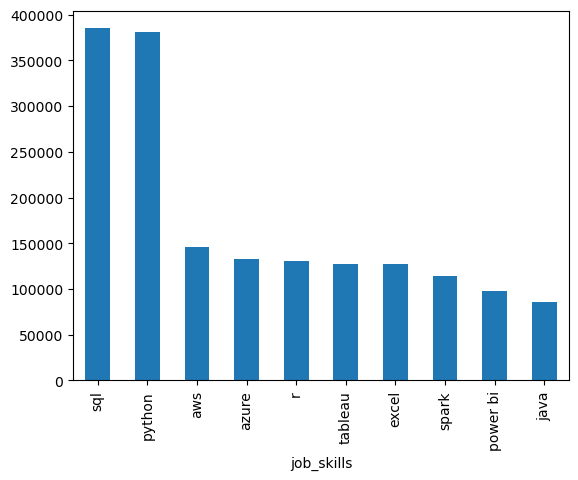

In [ ]:
bbj['job_skills'].value_counts().head(10).plot(kind = 'bar')

In [53]:
skills_count = bbj.groupby(['job_title_short','job_skills']).size()

In [68]:
ay_skills_count= skills_count.reset_index(name='skills count')

ay_skills_count

,job_title_short,job_skills,skills count
0,Business Analyst,airflow,318
1,Business Analyst,airtable,17
2,Business Analyst,alteryx,1078
3,Business Analyst,angular,87
4,Business Analyst,ansible,120
...,...,...,...
2251,Software Engineer,wrike,4
2252,Software Engineer,wsl,13
2253,Software Engineer,xamarin,35
2254,Software Engineer,yarn,145


In [55]:
ay_skills_count=ay_skills_count.sort_values(by='skills count',ascending=False)

ay_skills_count

,job_title_short,job_skills,skills count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


In [60]:
#job_title = 'Data Analyst'
#top_skills = 10

#ay_skills_final = ay_skills_count[ay_skills_count['job_title_short'] == job_title].head(top_skills)

#ay_skills_final.plot(kind = 'barh',x='job_skills',y='skill_count')

<Axes: ylabel='job_skills'>

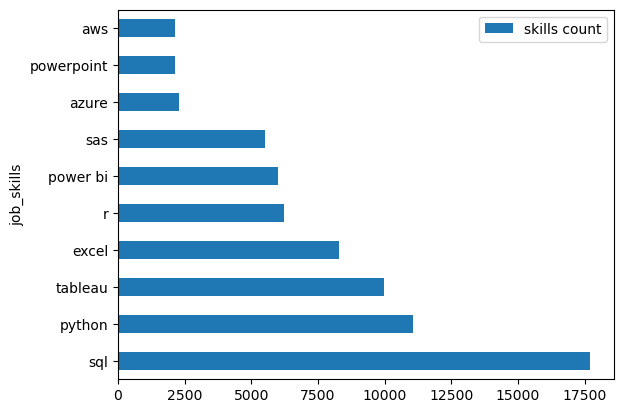

In [84]:
ay_skills_count[ay_skills_count['job_title_short']=='Senior Data Analyst'].sort_values(by='skills count',ascending=False).head(10).plot(kind='barh',x='job_skills',y='skills count')

Text(0.5, 1.0, 'Top 10 Skills for Senior Data Scientist')

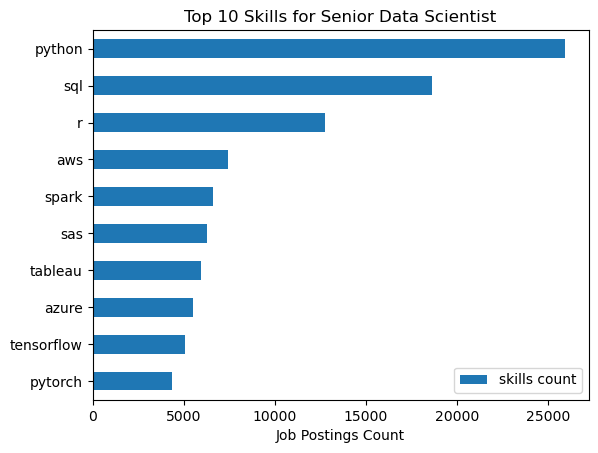

In [102]:
sds =   (ay_skills_count[ay_skills_count['job_title_short']=='Senior Data Scientist']
        .sort_values(by='skills count',ascending=True)
        )
sds.tail(10).plot(kind='barh',x='job_skills',y='skills count')
plt.xlabel('Job Postings Count')
plt.ylabel('')
plt.title('Top 10 Skills for Senior Data Scientist')

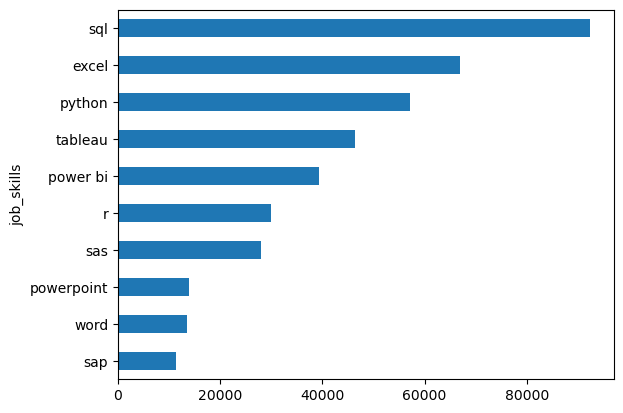

In [99]:
dta =   (ay_skills_count[ay_skills_count['job_title_short']=='Data Analyst']
        .sort_values(by='skills count',ascending=False)).head(10)
dta.plot(kind='barh',x='job_skills',y='skills count')
plt.gca().invert_yaxis()
plt.legend().set_visible(False)
plt.show()